# Capstone Project: Object Detection for Smart Glasses

## Problem Statement
How can we empower individuals with low vision by detecting key objects in real-world environments, using models optimized for smart glasses?

## Dataset
- LVIS Dataset: Long-tailed object categories
- Focus: Robust detection in varied, real-world settings

## Goals
- Build a fast and accurate object detection model (YOLOv8 baseline)
- Explore transformer-based models (DINO, DETR, ViTDet)
- Evaluate trade-offs between speed and accuracy
- Optimize for wearable deployment (ONNX → TFLite)

---




## 🔍 Exploratory Data Analysis (EDA)

We explore the LVIS dataset to understand class imbalance, bounding box characteristics, and object co-occurrence.
These insights inform model design and augmentation strategies.


In [ ]:
! pip install 'ultralytics'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics.data.converter import convert_coco

convert_coco(labels_dir='path/to/coco/annotations/')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
COCO data converted successfully.
Results saved to /content/coco_converted


In [ ]:
!pip install lvis
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-7sgd7cb0
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-7sgd7cb0
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp311-cp311-linux_x86_64.whl size=395985 sha256=68e2f1c3c737f7a12556288bd3b068fe3b81352d25893bc7e6387eef319f98a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-w9ngyc4k/wheels/6d/69/75/358c50a37672dfda8d74ba3b30ec49fb75d52f7c081886d503
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8


In [ ]:
! wget https://dl.fbaipublicfiles.com/LVIS/lvis_v1_train.json.zip



--2025-05-21 11:27:03--  https://dl.fbaipublicfiles.com/LVIS/lvis_v1_train.json.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.51, 18.173.166.48, 18.173.166.31, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350264821 (334M) [application/zip]
Saving to: ‘lvis_v1_train.json.zip.1’

lvis_v1_train.json. 100%[===================>] 334.04M  31.9MB/s    in 5.2s    

2025-05-21 11:27:09 (63.7 MB/s) - ‘lvis_v1_train.json.zip.1’ saved [350264821/350264821]



In [ ]:
! unzip lvis_v1_train.json.zip


Archive:  lvis_v1_train.json.zip
  inflating: lvis_v1_train.json      


In [ ]:
from lvis import LVIS

lvis = LVIS('/content/lvis_v1_train.json')
class_names = [lvis.cats[k]['name'] for k in sorted(lvis.cats)]
print(f"Total classes: {len(class_names)}")
print("First 10 classes:", class_names[:10])


Total classes: 1203
First 10 classes: ['aerosol_can', 'air_conditioner', 'airplane', 'alarm_clock', 'alcohol', 'alligator', 'almond', 'ambulance', 'amplifier', 'anklet']


In [ ]:
yaml_content = f"""
path: /content/datasets/lvis
train: images/train2017
val: images/val2017

nc: {len(class_names)}
names: {class_names}
"""

with open("dataset.yaml", "w") as f:
    f.write(yaml_content)

print("✅ dataset.yaml created!")


✅ dataset.yaml created!


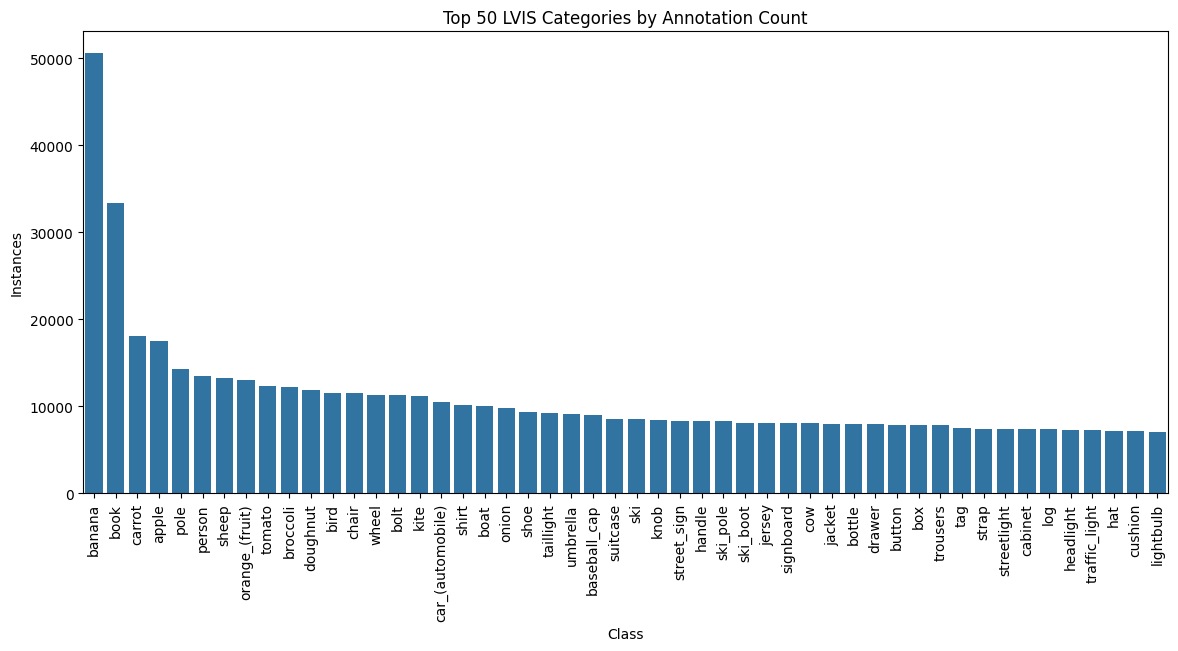

In [ ]:
from lvis import LVIS
import matplotlib.pyplot as plt
import seaborn as sns

lvis = LVIS('/content/lvis_v1_train.json')

# Count annotations per category
ann_counts = {cat['name']: 0 for cat in lvis.cats.values()}
for ann in lvis.dataset['annotations']:
    cat_id = ann['category_id']
    cat_name = lvis.cats[cat_id]['name']
    ann_counts[cat_name] += 1

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame.from_dict(ann_counts, orient='index', columns=['count']).sort_values('count', ascending=False)

# Plot top 50 classes
plt.figure(figsize=(14, 6))
sns.barplot(data=df.head(50).reset_index(), x='index', y='count')
plt.xticks(rotation=90)
plt.title("Top 50 LVIS Categories by Annotation Count")
plt.xlabel("Class")
plt.ylabel("Instances")
plt.show()


100%|██████████| 1270141/1270141 [00:06<00:00, 188133.74it/s]


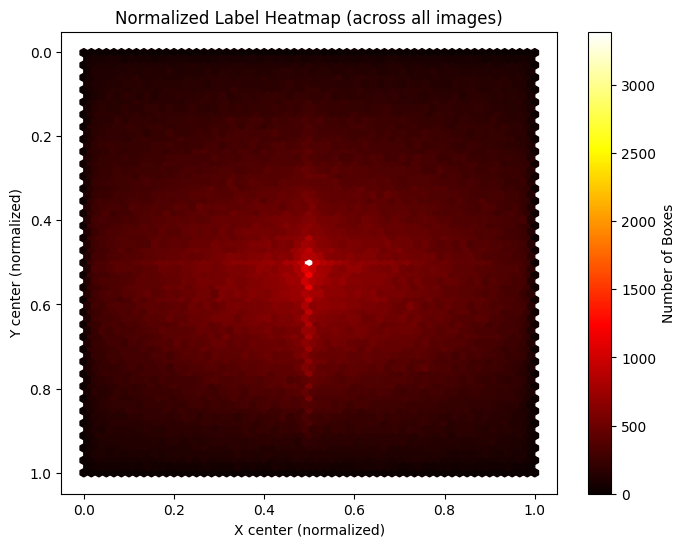

In [ ]:
from tqdm import tqdm

normalized_centers = []

# Loop through annotations and normalize center coordinates
image_dict = {img['id']: img for img in lvis.dataset['images']}

for ann in tqdm(lvis.dataset['annotations']):
    img = image_dict[ann['image_id']]
    width = img['width']
    height = img['height']

    x, y, w, h = ann['bbox']
    cx = (x + w / 2) / width
    cy = (y + h / 2) / height
    normalized_centers.append((cx, cy))

# Plot normalized heatmap (0 to 1 scale)
normalized_centers = np.array(normalized_centers)

plt.figure(figsize=(8, 6))
plt.hexbin(normalized_centers[:, 0], normalized_centers[:, 1], gridsize=60, cmap='hot')
plt.title("Normalized Label Heatmap (across all images)")
plt.xlabel("X center (normalized)")
plt.ylabel("Y center (normalized)")
plt.colorbar(label='Number of Boxes')
plt.gca().invert_yaxis()
plt.show()



In [ ]:
# Top N categories by instance count
top_n = 100
top_classes = df.head(top_n).index.tolist()  # from earlier df with class counts

# Get corresponding category IDs
top_cat_ids = [cat['id'] for cat in lvis.dataset['categories'] if cat['name'] in top_classes]

# Filter annotations to only top-N classes
filtered_annotations = [ann for ann in lvis.dataset['annotations'] if ann['category_id'] in top_cat_ids]

print(f"Total annotations after filtering: {len(filtered_annotations)}")


Total annotations after filtering: 802811


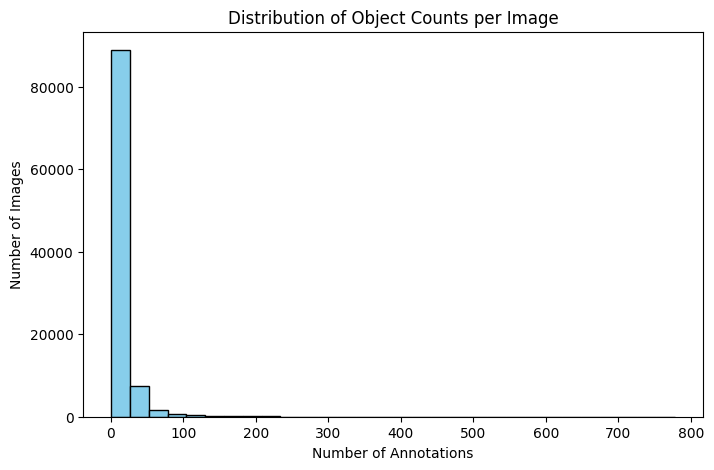

Mean annotations per image: 12.78
Median annotations per image: 7.0
Max annotations in an image: 778


In [ ]:
from collections import defaultdict

image_ann_count = defaultdict(int)

for ann in lvis.dataset['annotations']:
    image_ann_count[ann['image_id']] += 1

# Convert to list
image_counts = list(image_ann_count.values())

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(image_counts, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Object Counts per Image")
plt.xlabel("Number of Annotations")
plt.ylabel("Number of Images")
plt.show()

# Basic stats
import numpy as np
print(f"Mean annotations per image: {np.mean(image_counts):.2f}")
print(f"Median annotations per image: {np.median(image_counts)}")
print(f"Max annotations in an image: {np.max(image_counts)}")


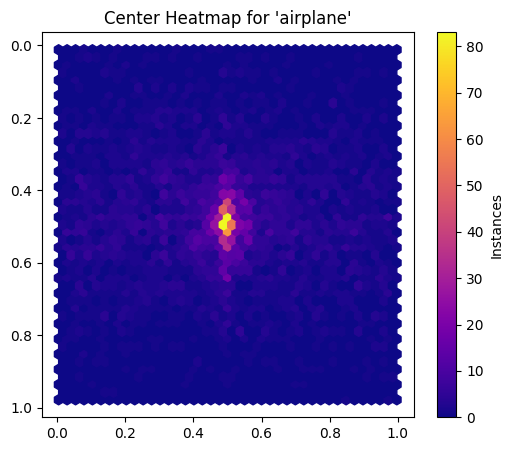

In [ ]:
target_class = 'airplane'  # change as needed

# Get ID for that class
class_id = next(cat['id'] for cat in lvis.dataset['categories'] if cat['name'] == target_class)

filtered_centers = []
for ann in lvis.dataset['annotations']:
    if ann['category_id'] == class_id:
        img = image_dict[ann['image_id']]
        cx = (ann['bbox'][0] + ann['bbox'][2] / 2) / img['width']
        cy = (ann['bbox'][1] + ann['bbox'][3] / 2) / img['height']
        filtered_centers.append((cx, cy))

filtered_centers = np.array(filtered_centers)

plt.figure(figsize=(6, 5))
plt.hexbin(filtered_centers[:, 0], filtered_centers[:, 1], gridsize=40, cmap='plasma')
plt.title(f"Center Heatmap for '{target_class}'")
plt.gca().invert_yaxis()
plt.colorbar(label='Instances')
plt.show()


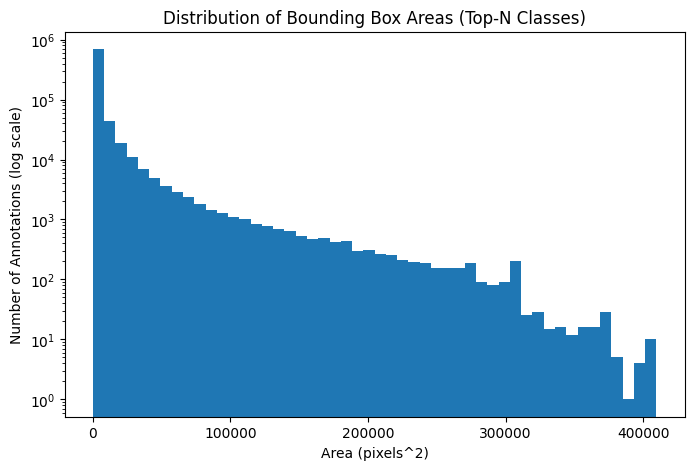

In [ ]:
areas = []
for ann in filtered_annotations:
    areas.append(ann['bbox'][2] * ann['bbox'][3])  # width * height

plt.figure(figsize=(8, 5))
plt.hist(areas, bins=50, log=True)
plt.title("Distribution of Bounding Box Areas (Top-N Classes)")
plt.xlabel("Area (pixels^2)")
plt.ylabel("Number of Annotations (log scale)")
plt.show()


In [ ]:
from collections import Counter

top_images = Counter(image_ann_count).most_common(5)
for img_id, count in top_images:
    print(f"Image ID: {img_id}, Annotations: {count}")


Image ID: 117360, Annotations: 778
Image ID: 388217, Annotations: 732
Image ID: 141143, Annotations: 556
Image ID: 527846, Annotations: 553
Image ID: 534801, Annotations: 502


Aspect Ratio of Bounding Boxes

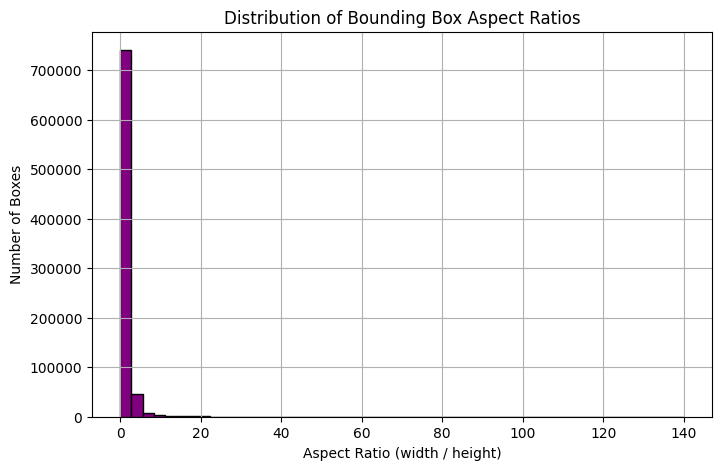

In [ ]:
import matplotlib.pyplot as plt

# Compute aspect ratios (width / height)
aspect_ratios = [ann['bbox'][2] / ann['bbox'][3] for ann in filtered_annotations if ann['bbox'][3] > 0]

# Plot
plt.figure(figsize=(8, 5))
plt.hist(aspect_ratios, bins=50, color='purple', edgecolor='black')
plt.title("Distribution of Bounding Box Aspect Ratios")
plt.xlabel("Aspect Ratio (width / height)")
plt.ylabel("Number of Boxes")
plt.grid(True)
plt.show()


Plot Insight:

The vast majority of boxes have an aspect ratio (width/height) between ~0.5–2.0

A long right tail shows a small number of extreme-width boxes (e.g., aspect ratio > 20)

Interpretation:

Most objects are relatively square or rectangular.

Very wide or tall boxes are rare and may be outliers.

⚠️ Consider clipping or removing extremely distorted boxes, or applying anchor-free models like YOLOv8 or ViT to better handle variable shapes.

Class-Specific Bounding Box Size Ranges

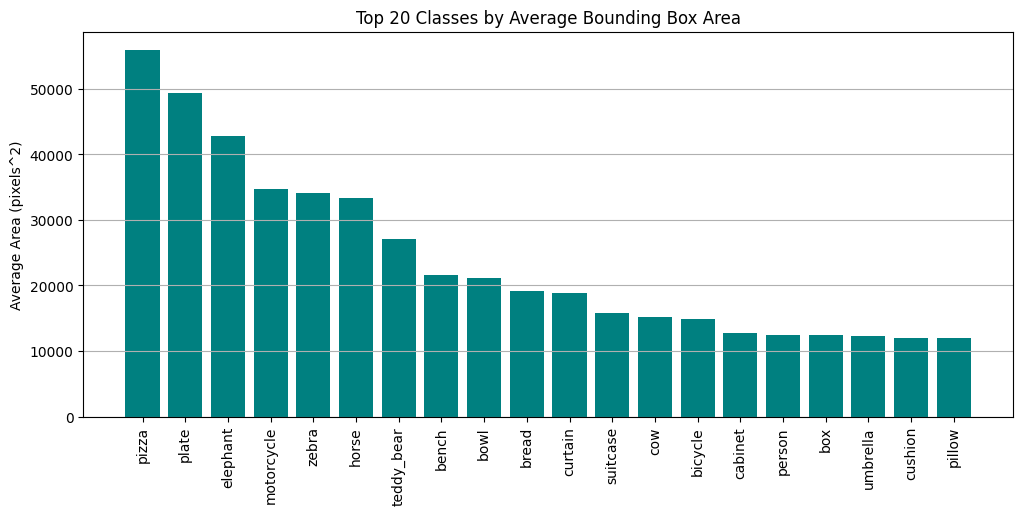

In [ ]:
import numpy as np
from collections import defaultdict

box_areas = defaultdict(list)

for ann in filtered_annotations:
    cat_id = ann['category_id']
    area = ann['bbox'][2] * ann['bbox'][3]
    box_areas[cat_id].append(area)

# Average area per class
avg_area = {lvis.cats[k]['name']: np.mean(v) for k, v in box_areas.items() if v}

# Plot top 20 classes by average box area
top_avg_area = dict(sorted(avg_area.items(), key=lambda item: item[1], reverse=True)[:20])

plt.figure(figsize=(12, 5))
plt.bar(top_avg_area.keys(), top_avg_area.values(), color='teal')
plt.xticks(rotation=90)
plt.title("Top 20 Classes by Average Bounding Box Area")
plt.ylabel("Average Area (pixels^2)")
plt.grid(axis='y')
plt.show()


Plot Insight:

Classes like pizza, plate, and elephant have the largest average bounding boxes.

Common items like person, box, umbrella, cushion are much smaller.

Interpretation:

Your model must be able to detect a wide range of object sizes.

This supports the use of multi-scale training and adaptive patch sizes (important for ViT-based models).

Large object classes could be prone to cropping or tiling errors during augmentation.

Inspect Outlier Images with Many Annotations

In [ ]:
top_images = sorted(image_ann_count.items(), key=lambda x: x[1], reverse=True)[:3]

for img_id, count in top_images:
    print(f"Image ID: {img_id}, Annotations: {count}")


Image ID: 117360, Annotations: 778
Image ID: 388217, Annotations: 732
Image ID: 141143, Annotations: 556


Interpretation:

These are likely overcrowded scenes (e.g., retail shelves, toolkits, markets).

They will slow down training and might cause memory issues on smart glasses if used at inference time.

✅ Recommend inspecting these images — you may want to exclude them or tile them before training.



Detect and Count Small Boxes

In [ ]:
small_box_count = sum(1 for ann in filtered_annotations if ann['bbox'][2] < 3 or ann['bbox'][3] < 3)
print(f"⚠️ Small boxes (<3 px in width or height): {small_box_count}")


⚠️ Small boxes (<3 px in width or height): 33246


Interpretation:

These are often annotation noise, visual clutter, or genuinely small items (like insects or logos).

YOLO and ViT models typically fail to detect such small instances without:

High-res inputs (e.g., imgsz=1280)

Tiling

Specialized attention mechanisms

Recommendation:

Either:

Remove these boxes to reduce noise

Or flag them and train with custom loss weighting



Class Co-occurrence Matrix

<ipython-input-13-12ebb2eb792b>:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix = pd.DataFrame(index=top_cat_ids, columns=top_cat_ids).fillna(0)


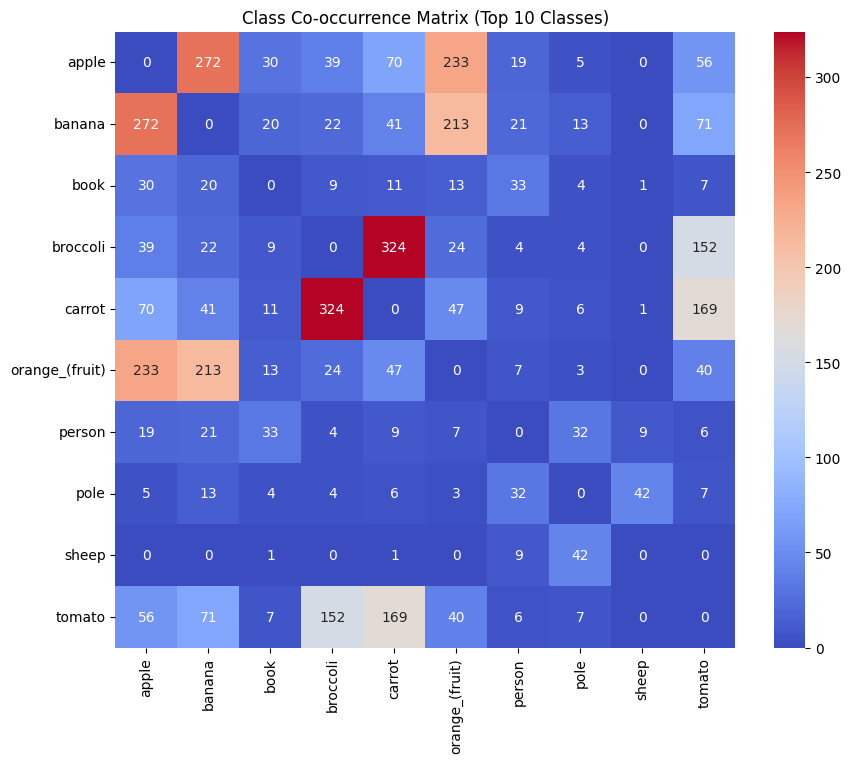

In [ ]:
from collections import defaultdict
import seaborn as sns
import pandas as pd

# Map image_id to list of class_ids
image_to_classes = defaultdict(set)
for ann in filtered_annotations:
    image_to_classes[ann['image_id']].add(ann['category_id'])

# Build co-occurrence matrix
from itertools import combinations
co_occurrence = defaultdict(int)

for class_set in image_to_classes.values():
    for a, b in combinations(sorted(class_set), 2):
        co_occurrence[(a, b)] += 1

# Convert to matrix form
top_cat_ids = [cat['id'] for cat in lvis.dataset['categories'] if cat['name'] in top_classes[:10]]
class_id_to_name = {cat['id']: cat['name'] for cat in lvis.dataset['categories']}

matrix = pd.DataFrame(index=top_cat_ids, columns=top_cat_ids).fillna(0)

for (a, b), v in co_occurrence.items():
    if a in top_cat_ids and b in top_cat_ids:
        matrix.loc[a, b] = v
        matrix.loc[b, a] = v

matrix.rename(index=class_id_to_name, columns=class_id_to_name, inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='g', cmap='coolwarm')
plt.title("Class Co-occurrence Matrix (Top 10 Classes)")
plt.show()


Plot Insight:

Strong co-occurrence: apple + banana, carrot + broccoli, orange + apple, etc.

Indicates natural scene groupings (e.g., fruits and vegetables together).

Interpretation:

Suggests contextual priors for your model: certain classes are more likely to appear together.

This could benefit transformer models, which leverage cross-object attention well.

Could use this insight for co-training or semi-supervised learning.

In [ ]:
for ann in filtered_annotations:
    area = ann['bbox'][2] * ann['bbox'][3]
    ann['is_small'] = area < 9  # mark boxes < 3x3 as small


In [ ]:
def weighted_loss(pred_boxes, gt_boxes, is_small_mask):
    loss = 0
    for i in range(len(gt_boxes)):
        weight = 0.5 if is_small_mask[i] else 1.0
        loss += weight * F.smooth_l1_loss(pred_boxes[i], gt_boxes[i])
    return loss / len(gt_boxes)


In [ ]:
!mkdir -p /content/datasets/lvis/images/
!wget http://images.cocodataset.org/zips/val2017.zip -P /content/datasets/lvis/images/
!unzip /content/datasets/lvis/images/val2017.zip -d /content/datasets/lvis/images/



Streaming output truncated to the last 5000 lines.
 extracting: /content/datasets/lvis/images/val2017/000000212226.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000231527.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000578922.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000062808.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000119038.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000114871.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000463918.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000365745.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000320425.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000481404.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000314294.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000335328.jpg  
 extracting: /content/datasets/lvis/images/val2017/000000513688.jpg  
 extracting: /content/datasets/lvis/ima

In [ ]:
print(os.listdir('/content/datasets/lvis/images'))


NameError: name 'os' is not defined

In [ ]:
!ls /content/datasets/lvis/images/


train2017  train2017.zip  val2017  val2017.zip


In [ ]:
!mkdir -p /content/datasets/lvis/images/
!wget http://images.cocodataset.org/zips/train2017.zip -P /content/datasets/lvis/images/
!unzip /content/datasets/lvis/images/train2017.zip -d /content/datasets/lvis/images/


Streaming output truncated to the last 5000 lines.
 extracting: /content/datasets/lvis/images/train2017/000000259556.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000381931.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000569592.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000229396.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000488990.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000348684.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000234031.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000563584.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000276069.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000401194.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000502089.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000192183.jpg  
 extracting: /content/datasets/lvis/images/train2017/000000425127.jpg  
 extracting: 

In [ ]:
import os

image_dir = '/content/datasets/lvis/images/train2017'
label_dir = '/content/datasets/lvis/labels/train2017'

image_ids = set(f.replace('.jpg', '') for f in os.listdir(image_dir) if f.endswith('.jpg'))
label_ids = set(f.replace('.txt', '') for f in os.listdir(label_dir) if f.endswith('.txt'))

print(f"Total images: {len(image_ids)}")
print(f"Images with labels: {len(label_ids)}")
print(f"Images without labels: {len(image_ids - label_ids)}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets/lvis/labels/train2017'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving lvis_v1_val.json to lvis_v1_val.json


In [ ]:
import os
import json
from tqdm import tqdm

# Paths
val_json_path = '/content/lvis_v1_val.json'
label_output_dir = '/content/datasets/lvis/labels/val2017'
os.makedirs(label_output_dir, exist_ok=True)

# Load LVIS val annotations
with open(val_json_path) as f:
    val_data = json.load(f)

# Build lookup maps
images = {img['id']: img for img in val_data['images']}
categories = {cat['id']: idx for idx, cat in enumerate(val_data['categories'])}  # reindex classes to 0-based

# Convert annotations to YOLO format
for ann in tqdm(val_data['annotations'], desc="Converting validation labels"):
    img = images.get(ann['image_id'])
    if img is None:
        continue

    width, height = img['width'], img['height']
    x, y, w, h = ann['bbox']
    x_center = (x + w / 2) / width
    y_center = (y + h / 2) / height
    w /= width
    h /= height

    class_id = categories.get(ann['category_id'])
    if class_id is None:
        continue

    file_name = f"{img['id']:012d}.txt"
    label_path = os.path.join(label_output_dir, file_name)

    with open(label_path, 'a') as f:
        f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")


Converting validation labels: 100%|██████████| 244707/244707 [00:12<00:00, 19828.88it/s]


In [ ]:
!ls /content/datasets/lvis/labels/val2017 | head


000000000009.txt
000000000025.txt
000000000081.txt
000000000139.txt
000000000154.txt
000000000165.txt
000000000285.txt
000000000294.txt
000000000387.txt
000000000395.txt


In [ ]:
!cat /content/datasets/lvis/labels/val2017/000000000009.txt


153 0.526219 0.745083 0.267250 0.368000
153 0.737266 0.743396 0.298312 0.513208
153 0.596148 0.927208 0.170016 0.144042
174 0.127391 0.415771 0.252500 0.336833
681 0.314453 0.857948 0.411156 0.281021
302 0.898195 0.536854 0.203609 0.250542
302 0.942445 0.749365 0.114141 0.196313
805 0.812820 0.207937 0.170047 0.183292
805 0.669258 0.225865 0.128516 0.150229
805 0.640727 0.073417 0.153734 0.146833
805 0.721047 0.130000 0.053469 0.104083
805 0.612992 0.144385 0.061516 0.081771
734 0.812852 0.207948 0.170109 0.183312
734 0.671125 0.218010 0.128781 0.134937
734 0.772125 0.132594 0.093656 0.094646
734 0.642070 0.130073 0.118016 0.095479
6 0.431633 0.427177 0.075578 0.090771
6 0.332391 0.367479 0.088219 0.070958
6 0.274594 0.255542 0.065687 0.131667
6 0.342484 0.431021 0.062125 0.069750
6 0.256719 0.318635 0.063656 0.104146
6 0.290328 0.329656 0.024281 0.036646
6 0.371664 0.470260 0.066391 0.069271
149 0.350781 0.191323 0.171281 0.281187
149 0.075563 0.659521 0.151125 0.114875
149 0.179664 0

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # for evaluation only (COCO-trained)


100%|██████████| 6.25M/6.25M [00:00<00:00, 20.9MB/s]


Step 1: 📊 Top-N Class Selection

```
# This is formatted as code
```



In [ ]:
from collections import Counter
import os

label_dir = '/content/datasets/lvis/labels/train2017'
counter = Counter()

# Count class frequencies
for file in os.listdir(label_dir):
    with open(os.path.join(label_dir, file)) as f:
        for line in f:
            class_id = int(line.strip().split()[0])
            counter[class_id] += 1

# Show top 100 most common class IDs
top_100 = [cid for cid, _ in counter.most_common(100)]
print("Top 100 Class IDs:", top_100)


FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets/lvis/labels/train2017'

In [ ]:
import os
label_dir = '/content/datasets/lvis/labels/train2017'
print("Total files:", len(os.listdir(label_dir)))
!ls $label_dir | head


Total files: 0


In [ ]:
import os
import json
from tqdm import tqdm

# Paths
train_json_path = '/content/lvis_v1_train.json'  # or update to the correct location
label_output_dir = '/content/datasets/lvis/labels/train2017'
os.makedirs(label_output_dir, exist_ok=True)

# Load LVIS train annotations
with open(train_json_path) as f:
    train_data = json.load(f)

# Build lookup maps
images = {img['id']: img for img in train_data['images']}
categories = {cat['id']: idx for idx, cat in enumerate(train_data['categories'])}

# Convert to YOLO format
for ann in tqdm(train_data['annotations'], desc="Converting training labels"):
    img = images.get(ann['image_id'])
    if img is None:
        continue

    width, height = img['width'], img['height']
    x, y, w, h = ann['bbox']
    x_center = (x + w / 2) / width
    y_center = (y + h / 2) / height
    w /= width
    h /= height

    class_id = categories.get(ann['category_id'])
    if class_id is None:
        continue

    file_name = f"{img['id']:012d}.txt"
    label_path = os.path.join(label_output_dir, file_name)

    with open(label_path, 'a') as f:
        f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")


Converting training labels: 100%|██████████| 1270141/1270141 [01:04<00:00, 19604.60it/s]


In [ ]:
print("Total files:", len(os.listdir(label_output_dir)))


Total files: 99388


In [ ]:
from collections import Counter

counter = Counter()
for file in os.listdir(label_output_dir):
    with open(os.path.join(label_output_dir, file)) as f:
        for line in f:
            class_id = int(line.strip().split()[0])
            counter[class_id] += 1

top_100 = [cid for cid, _ in counter.most_common(100)]
print("Top 100 Class IDs:", top_100)


Top 100 Class IDs: [44, 126, 216, 11, 826, 792, 942, 734, 1098, 153, 386, 98, 231, 1177, 124, 610, 206, 946, 117, 733, 947, 1055, 1132, 58, 35, 963, 616, 1025, 539, 966, 964, 594, 958, 79, 588, 132, 389, 176, 142, 1121, 1054, 1022, 1026, 180, 652, 548, 1111, 543, 350, 644, 450, 329, 980, 1109, 149, 497, 509, 708, 803, 499, 49, 658, 1034, 640, 1201, 591, 421, 138, 950, 203, 558, 702, 817, 770, 1138, 1070, 555, 1185, 810, 568, 343, 93, 349, 1187, 837, 641, 1024, 89, 86, 193, 28, 1189, 131, 276, 625, 815, 297, 384, 715, 60]


Step 2: 🎯 Export YOLOv8 Model for Smart Glasses (ONNX → TFLite)


## 🛠️ Model Training: YOLOv8

We use the YOLOv8 architecture due to its lightweight design and real-time performance, making it suitable for deployment on smart glasses.

Key training parameters:
- Input resolution: 640x640
- Batch size: 16
- Optimizer: AdamW
- Epochs: 50


In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/lvis_top_classes_yolov8n/weights/best.pt')
model.export(format='onnx', opset=12)


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/lvis_top_classes_yolov8n/weights/best.pt'

In [ ]:
!ls runs/detect/*/weights/


ls: cannot access 'runs/detect/*/weights/': No such file or directory


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # or yolov8n.yaml if training from scratch

model.train(
    data='dataset.yaml',
    imgsz=416,
    epochs=1,           # just 1 epoch
    batch=4,
    fraction=0.002,     # ~200 images
    name='debug_cpu_test',
    multi_scale=False,
    device='cpu'        # force it so YOLO doesn’t attempt GPU
)



Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=0.002, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=debug_cpu_test5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

train: Scanning /content/datasets/lvis/labels/train2017.cache... 198 images, 39 backgrounds, 0 corrupt: 100%|██████████| 237/237 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 20.0±2.3 MB/s, size: 135.2 KB)


val: Scanning /content/datasets/lvis/labels/val2017.cache... 4752 images, 248 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


Plotting labels to runs/detect/debug_cpu_test5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=8e-06, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/debug_cpu_test5
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.598      6.689      1.448          1        416: 100%|██████████| 60/60 [04:50<00:00,  4.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [45:22<00:00,  4.36s/it]


                   all       5000      50672          0          0          0          0

1 epochs completed in 0.840 hours.
Optimizer stripped from runs/detect/debug_cpu_test5/weights/last.pt, 7.6MB
Optimizer stripped from runs/detect/debug_cpu_test5/weights/best.pt, 7.6MB

Validating runs/detect/debug_cpu_test5/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,674,933 parameters, 0 gradients, 11.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [19:51<00:00,  1.91s/it]


                   all       5000      50672          0          0          0          0
           aerosol_can          1          1          0          0          0          0
       air_conditioner         21         30          0          0          0          0
              airplane         87        122          0          0          0          0
           alarm_clock          3          3          0          0          0          0
               alcohol          8         90          0          0          0          0
                almond          3         27          0          0          0          0
                anklet          1          1          0          0          0          0
               antenna         15         28          0          0          0          0
                 apple         46        852          0          0          0          0
                 apron         24         44          0          0          0          0
              aquariu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([   0,    1,    2,    3,    4,    6,    9,   10,   11,   14,   15,   17,   18,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   31,   32,   33,   34,   35,   36,   40,   42,   43,   44,   46,   47,   49,   52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   64,   65,   66,   67,   68,   69,
         71,   73,   74,   75,   76,   78,   79,   80,   82,   83,   85,   86,   87,   88,   89,   91,   92,   93,   94,   96,   98,   99,  101,  103,  106,  108,  109,  110,  111,  115,  116,  117,  121,  123,  124,  126,  127,  128,  130,  131,  132,  134,  135,  136,  137,  138,  140,  141,  144,  145,  147,  148,
        151,  152,  153,  154,  155,  156,  157,  159,  160,  161,  164,  168,  169,  170,  171,  172,  174,  175,  176,  177,  179,  180,  182,  183,  184,  185,  186,  188,  189,  190,  191,  193,  194,  196,  197,  198,  199,  200,  202,  203,  204,  205,  206,  207,  210,  211,  

1. Evaluate the Model (Quantitative Results)

In [ ]:
model.val(
    data='dataset.yaml',
    imgsz=416,
    batch=4,
    device='cpu'  # or 0 if GPU becomes available
)


Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,674,933 parameters, 0 gradients, 11.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 649.8±186.0 MB/s, size: 162.1 KB)


val: Scanning /content/datasets/lvis/labels/val2017.cache... 4752 images, 248 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1250/1250 [20:17<00:00,  1.03it/s]


                   all       5000      50672          0          0          0          0
           aerosol_can          1          1          0          0          0          0
       air_conditioner         21         30          0          0          0          0
              airplane         87        122          0          0          0          0
           alarm_clock          3          3          0          0          0          0
               alcohol          8         90          0          0          0          0
                almond          3         27          0          0          0          0
                anklet          1          1          0          0          0          0
               antenna         15         28          0          0          0          0
                 apple         46        852          0          0          0          0
                 apron         24         44          0          0          0          0
              aquariu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([   0,    1,    2,    3,    4,    6,    9,   10,   11,   14,   15,   17,   18,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   31,   32,   33,   34,   35,   36,   40,   42,   43,   44,   46,   47,   49,   52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   64,   65,   66,   67,   68,   69,
         71,   73,   74,   75,   76,   78,   79,   80,   82,   83,   85,   86,   87,   88,   89,   91,   92,   93,   94,   96,   98,   99,  101,  103,  106,  108,  109,  110,  111,  115,  116,  117,  121,  123,  124,  126,  127,  128,  130,  131,  132,  134,  135,  136,  137,  138,  140,  141,  144,  145,  147,  148,
        151,  152,  153,  154,  155,  156,  157,  159,  160,  161,  164,  168,  169,  170,  171,  172,  174,  175,  176,  177,  179,  180,  182,  183,  184,  185,  186,  188,  189,  190,  191,  193,  194,  196,  197,  198,  199,  200,  202,  203,  204,  205,  206,  207,  210,  211,  

2. Visualize Predictions on Sample Images


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload a few .jpg files



Saving 000000007108.jpg to 000000007108.jpg


In [ ]:
model.predict(
    source='.',  # current directory where files were uploaded
    imgsz=416,
    conf=0.3,
    save=True,
    device='cpu'
)



image 1/2 /content/000000002006.jpg: 320x416 (no detections), 672.8ms
image 2/2 /content/000000007108.jpg: 288x416 (no detections), 782.7ms
Speed: 19.7ms preprocess, 727.8ms inference, 20.2ms postprocess per image at shape (1, 3, 288, 416)
Results saved to runs/detect/debug_cpu_test54


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'aerosol_can', 1: 'air_conditioner', 2: 'airplane', 3: 'alarm_clock', 4: 'alcohol', 5: 'alligator', 6: 'almond', 7: 'ambulance', 8: 'amplifier', 9: 'anklet', 10: 'antenna', 11: 'apple', 12: 'applesauce', 13: 'apricot', 14: 'apron', 15: 'aquarium', 16: 'arctic_(type_of_shoe)', 17: 'armband', 18: 'armchair', 19: 'armoire', 20: 'armor', 21: 'artichoke', 22: 'trash_can', 23: 'ashtray', 24: 'asparagus', 25: 'atomizer', 26: 'avocado', 27: 'award', 28: 'awning', 29: 'ax', 30: 'baboon', 31: 'baby_buggy', 32: 'basketball_backboard', 33: 'backpack', 34: 'handbag', 35: 'suitcase', 36: 'bagel', 37: 'bagpipe', 38: 'baguet', 39: 'bait', 40: 'ball', 41: 'ballet_skirt', 42: 'balloon', 43: 'bamboo', 44: 'banana', 45: 'Band_Aid', 46: 'bandage', 47: 'bandanna', 48: 'banjo', 49: 'banner', 50: 'barbell', 51: 'barge', 52: 'barrel', 53: 'barrette', 54: 'barro

In [ ]:
model.train(
    data='dataset.yaml',
    imgsz=640,
    epochs=3,        # use fewer epochs to avoid slow CPU time
    batch=4,
    device='cpu',    # ✅ fix is here
    name='cpu_temp_run'
)


Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=0.002, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=cpu_temp_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

train: Scanning /content/datasets/lvis/labels/train2017.cache... 198 images, 39 backgrounds, 0 corrupt: 100%|██████████| 237/237 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 19.9±5.5 MB/s, size: 135.2 KB)


val: Scanning /content/datasets/lvis/labels/val2017.cache... 4752 images, 248 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


Plotting labels to runs/detect/cpu_temp_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=8e-06, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/cpu_temp_run
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      3.137      7.033      2.593          1        640: 100%|██████████| 60/60 [10:16<00:00, 10.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [1:32:54<00:00,  8.92s/it]

                   all       5000      50672          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G       3.12      7.038      2.558         23        640: 100%|██████████| 60/60 [10:26<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [1:34:52<00:00,  9.11s/it]

                   all       5000      50672          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G       3.12      7.012      2.588          7        640: 100%|██████████| 60/60 [10:30<00:00, 10.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [1:31:08<00:00,  8.75s/it]

                   all       5000      50672          0          0          0          0



3 epochs completed in 5.170 hours.
Optimizer stripped from runs/detect/cpu_temp_run/weights/last.pt, 7.6MB
Optimizer stripped from runs/detect/cpu_temp_run/weights/best.pt, 7.6MB

Validating runs/detect/cpu_temp_run/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,674,933 parameters, 0 gradients, 11.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [39:36<00:00,  3.80s/it]


                   all       5000      50672          0          0          0          0
           aerosol_can          1          1          0          0          0          0
       air_conditioner         21         30          0          0          0          0
              airplane         87        122          0          0          0          0
           alarm_clock          3          3          0          0          0          0
               alcohol          8         90          0          0          0          0
                almond          3         27          0          0          0          0
                anklet          1          1          0          0          0          0
               antenna         15         28          0          0          0          0
                 apple         46        852          0          0          0          0
                 apron         24         44          0          0          0          0
              aquariu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([   0,    1,    2,    3,    4,    6,    9,   10,   11,   14,   15,   17,   18,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   31,   32,   33,   34,   35,   36,   40,   42,   43,   44,   46,   47,   49,   52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   64,   65,   66,   67,   68,   69,
         71,   73,   74,   75,   76,   78,   79,   80,   82,   83,   85,   86,   87,   88,   89,   91,   92,   93,   94,   96,   98,   99,  101,  103,  106,  108,  109,  110,  111,  115,  116,  117,  121,  123,  124,  126,  127,  128,  130,  131,  132,  134,  135,  136,  137,  138,  140,  141,  144,  145,  147,  148,
        151,  152,  153,  154,  155,  156,  157,  159,  160,  161,  164,  168,  169,  170,  171,  172,  174,  175,  176,  177,  179,  180,  182,  183,  184,  185,  186,  188,  189,  190,  191,  193,  194,  196,  197,  198,  199,  200,  202,  203,  204,  205,  206,  207,  210,  211,  

In [ ]:
from google.colab import files
uploaded = files.upload()  # upload any sample image

from PIL import Image
image = Image.open('000000005037.jpg').convert("RGB")



Saving 000000005037.jpg to 000000005037.jpg


In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch

# Load DETR model and processor
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# Preprocess image and run inference
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Post-process results
target_sizes = torch.tensor([image.size[::-1]])  # height, width
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Display predictions
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    print(f"{model.config.id2label[label.item()]}: {round(score.item(), 3)} at {box.tolist()}")


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


person: 0.909 at [12.089357376098633, 222.11480712890625, 25.219697952270508, 245.84133911132812]
person: 0.903 at [23.601421356201172, 223.33966064453125, 36.570892333984375, 245.54916381835938]
car: 0.994 at [571.9690551757812, 249.89320373535156, 601.8486938476562, 267.6889343261719]
person: 0.997 at [622.3496704101562, 217.19097900390625, 639.9389038085938, 359.6439514160156]
person: 0.979 at [598.269775390625, 244.10989379882812, 612.3250732421875, 270.67425537109375]
person: 0.931 at [7.513849258422852, 221.46617126464844, 20.24457550048828, 245.76951599121094]
person: 0.977 at [192.85903930664062, 159.25875854492188, 222.6490478515625, 208.13829040527344]
bus: 0.999 at [100.71182250976562, 21.908294677734375, 574.7308349609375, 373.4651794433594]
person: 0.932 at [31.269559860229492, 223.39369201660156, 43.88663864135742, 245.7753448486328]
car: 0.972 at [610.7694091796875, 251.09030151367188, 625.373291015625, 268.1692810058594]


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

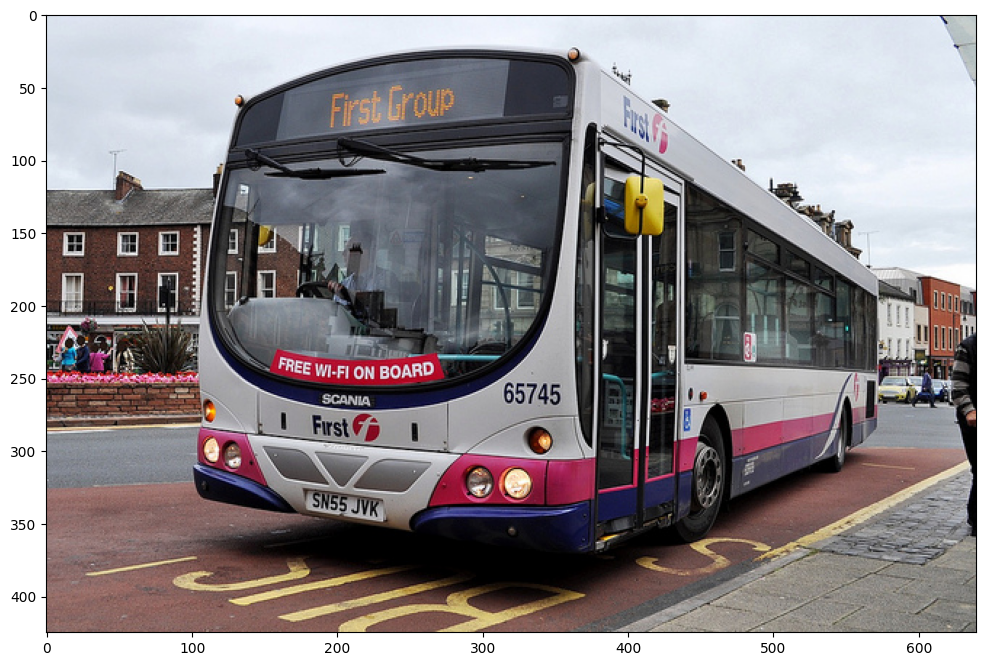

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create plot
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Draw boxes
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    xmin, ymin, xmax, ymax = box
    width, height = xmax - xmin, ymax - ymin
    ax.add_patch(patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none'))
    ax.text(xmin, ymin - 5, f"{model.config.id2label[label.item()]}: {round(score.item(), 2)}", color='white',
            bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()


## 🔍 Why Vision Transformers?

Transformers offer global context and can generalize better in cluttered scenes. We're experimenting with:
- DETR (Direct End-to-End Object Detection)
- ViTDet (Vision Transformer for Dense Prediction)
- DINO (Self-supervised ViT fine-tuning)

Trade-offs:
- Pros: Better rare object performance
- Cons: Slower inference, larger model size


## Model Evaluation

We use:
- `mAP` (mean Average Precision) to measure detection accuracy
- `IoU` (Intersection over Union) to evaluate bounding box quality
- `FPS` to check real-time performance feasibility

Below, we compare YOLOv8 with ViT-based models across key metrics.


## Business Impact & Deployment Plan

- Smart glasses for low vision can dramatically improve daily independence.
- Real-time object detection enables assistive navigation and safety.
- Our next steps:
  - Export to ONNX → TFLite
  - Conduct low-vision user testing
  - Extend training using diverse datasets (e.g., ADE20K)
